<a href="https://colab.research.google.com/github/ambroz72/Data-Analytics---BSBI/blob/master/Cryptocurrency%20price%20prediction%20%26%20find%20best%20model(RF%2CKNN%2CLR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error


In [3]:
# Loading datasets
bitcoin_df = pd.read_csv("Bitcoin2.csv")
ethereum_df = pd.read_csv("ethereum2.csv")

In [4]:
bitcoin_df

,Date,Open,High,Low,Close,Volume,Currency
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD
...,...,...,...,...,...,...,...
1146,2022-08-18,23331.542969,23567.285156,23152.455078,23222.242188,4546110.0,USD
1147,2022-08-19,23219.097656,23219.097656,20898.304688,20902.404297,13856579.0,USD
1148,2022-08-20,20899.923828,21344.845703,20864.435547,21153.019531,7139073.0,USD
1149,2022-08-21,21153.412109,21695.794922,21125.320312,21561.177734,6657571.0,USD


In [5]:
ethereum_df

,date,Open,High,Low,Close,price,Currency
0,3/10/2016,11.20,11.85,11.07,11.75,4,USD
1,3/11/2016,11.75,11.95,11.75,11.95,179,USD
2,3/12/2016,11.95,13.45,11.95,12.92,833,USD
3,3/13/2016,12.92,15.07,12.92,15.07,1295,USD
4,3/14/2016,15.07,15.07,11.40,12.50,92183,USD
...,...,...,...,...,...,...,...
2353,8/19/2022,1846.52,1846.97,1607.60,1609.48,1594321,USD
2354,8/20/2022,1609.01,1654.84,1525.51,1575.60,1007240,USD
2355,8/21/2022,1575.61,1644.88,1563.92,1618.25,852071,USD
2356,8/22/2022,1618.21,1627.13,1531.91,1626.75,1044290,USD


In [6]:
# Identify relevant features
print(bitcoin_df.columns)
print(ethereum_df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')
Index(['date', 'Open', 'High', 'Low', 'Close', 'price', 'Currency'], dtype='object')


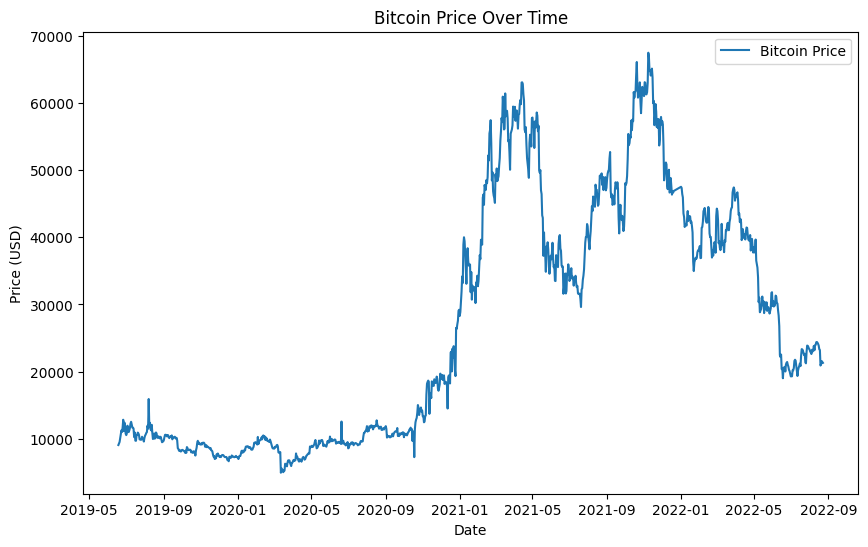

In [7]:
# Visualize Bitcoin price data over time series
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_df['Date'], bitcoin_df['Close'], label='Bitcoin Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [8]:
# Descriptive statistics for numerical features
print(bitcoin_df.describe())


                                Date          Open          High  \
count                           1151   1151.000000   1151.000000   
mean   2021-01-15 05:41:32.788879104  26488.652992  27528.416710   
min              2019-06-18 00:00:00   4943.832520   5338.512695   
25%              2020-03-31 12:00:00   9706.758301  10090.012695   
50%              2021-01-13 00:00:00  20873.337891  21867.822266   
75%              2021-10-27 12:00:00  41782.333984  42749.439453   
max              2022-08-23 00:00:00  67470.437500  85563.984375   
std                              NaN  17963.101635  18432.925246   

                Low         Close        Volume  
count   1151.000000   1151.000000  1.151000e+03  
mean   25416.606967  26496.733082  2.874051e+07  
min        0.076853   4936.755371  0.000000e+00  
25%     9360.636230   9712.636719  7.495500e+03  
50%    20245.201172  20902.404297  1.864334e+06  
75%    40890.394531  41782.333984  4.076471e+07  
max    66072.343750  67502.421875  5.

In [9]:
# Analyze categorical features (if any)
print(bitcoin_df['Currency'].value_counts())

Currency
USD    1151
Name: count, dtype: int64


In [10]:
# Check for missing values
print(bitcoin_df.isnull().sum())

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64


In [11]:
# Define the target variable as future closing price (next time window)
bitcoin_df['Future_Close'] = bitcoin_df['Close'].shift(-1)

In [12]:
# Drop last row as it has NaN value in 'Future_Close'
bitcoin_df = bitcoin_df.dropna()

In [13]:
# Feature engineering: price change and price spread
bitcoin_df['Price_Change'] = bitcoin_df['Close'] - bitcoin_df['Open']
bitcoin_df['Price_Spread'] = bitcoin_df['High'] - bitcoin_df['Low']

<ipython-input-13-a3368d998e4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_df['Price_Change'] = bitcoin_df['Close'] - bitcoin_df['Open']
<ipython-input-13-a3368d998e4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_df['Price_Spread'] = bitcoin_df['High'] - bitcoin_df['Low']


In [14]:
# Select relevant features for the model
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change', 'Price_Spread']
X = bitcoin_df[features]
y = bitcoin_df['Future_Close']


In [15]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# Random Forest for feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=features)
print(feature_importances)

Open            0.301680
High            0.028549
Low             0.025726
Close           0.641899
Volume          0.000986
Price_Change    0.000513
Price_Spread    0.000647
dtype: float64


In [19]:
# Wrapper method: Recursive Feature Elimination (RFE) with Linear Regression
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)


In [20]:
# Print selected features
print("Selected features from RFE:", np.array(features)[rfe.support_])

Selected features from RFE: ['Open' 'High' 'Low' 'Close' 'Price_Change']


In [21]:
# Embedded method: Lasso Regression (L1 Regularization)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_coef = pd.Series(lasso.coef_, index=features)
print("Lasso coefficients:", lasso_coef)

Lasso coefficients: Open            17800.104925
High             -456.025443
Low               -36.509811
Close             574.895575
Volume             -8.703813
Price_Change     1174.892467
Price_Spread       73.355314
dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.073e+08, tolerance: 2.982e+07
  model = cd_fast.enet_coordinate_descent(


In [22]:
# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()
knn_model = KNeighborsRegressor(n_neighbors=5)

In [23]:
# Train models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [24]:
# Make predictions
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

In [25]:
# Calculate RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))


In [26]:
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Linear Regression RMSE: {lr_rmse}')
print(f'KNN RMSE: {knn_rmse}')

Random Forest RMSE: 1468.47123777855
Linear Regression RMSE: 1265.1467645411597
KNN RMSE: 2853.6924355174956


In [27]:
# Compare RMSE and select the best model
best_model = min(rf_rmse, lr_rmse, knn_rmse)
print(f'Best Model RMSE: {best_model}')

Best Model RMSE: 1265.1467645411597
